In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import to_graphviz
from xgboost import plot_importance

%matplotlib inline

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve

pd.options.display.max_columns= None
#pd.options.display.max_rows = None

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change_No,diabetesMed_Yes,readmitted
0,1,41,0,1,0,0,0,1,1,0,0
1,10,56,2,24,0,0,0,9,0,1,1
2,9,61,4,25,0,0,0,9,0,1,0
3,11,68,0,25,0,0,0,9,0,1,1
4,6,47,2,13,0,0,0,8,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
101761,1,1,2,5,0,0,0,7,1,1,0
101762,4,66,0,16,0,0,0,9,1,0,0
101763,6,61,1,14,0,0,0,9,1,1,0
101764,9,45,6,23,0,0,0,9,1,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   time_in_hospital    101766 non-null  int64
 1   num_lab_procedures  101766 non-null  int64
 2   num_procedures      101766 non-null  int64
 3   num_medications     101766 non-null  int64
 4   number_outpatient   101766 non-null  int64
 5   number_emergency    101766 non-null  int64
 6   number_inpatient    101766 non-null  int64
 7   number_diagnoses    101766 non-null  int64
 8   change_No           101766 non-null  int64
 9   diabetesMed_Yes     101766 non-null  int64
 10  readmitted          101766 non-null  int64
dtypes: int64(11)
memory usage: 8.5 MB


In [5]:
df.describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change_No,diabetesMed_Yes,readmitted
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607,0.538048,0.770031,0.460881
std,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600,0.498553,0.420815,0.498470
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,0.000000,1.000000,0.000000
50%,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000,1.000000,1.000000,0.000000
75%,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,1.000000,1.000000,1.000000
max,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000,1.000000,1.000000,1.000000


In [6]:
df.shape

(101766, 11)

### Standardize and Preprocessing

In [7]:
X = df.iloc[:,0:10]
y = df.iloc[:,10]

In [8]:
scaler = StandardScaler()

In [9]:
X_scaled = scaler.fit_transform(X)

In [10]:
X_scaled

array([[-1.13764856, -0.10651686, -0.78539774, ..., -3.3215959 ,
         0.92659052, -1.82986799],
       [ 1.87733278,  0.65590042,  0.38707362, ...,  0.81578448,
        -1.07922537,  0.54648751],
       [ 1.54233485,  0.91003951,  1.55954498, ...,  0.81578448,
        -1.07922537,  0.54648751],
       ...,
       [ 0.53734107,  0.91003951, -0.19916206, ...,  0.81578448,
         0.92659052,  0.54648751],
       [ 1.54233485,  0.09679441,  2.73201634, ...,  0.81578448,
         0.92659052, -1.82986799],
       [-0.46765271,  1.06252297, -0.19916206, ...,  0.81578448,
        -1.07922537,  0.54648751]])

In [11]:
X_scaled_df = pd.DataFrame(X_scaled,columns=X.columns)

In [12]:
X_scaled_df

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change_No,diabetesMed_Yes
0,-1.137649,-0.106517,-0.785398,-1.848268,-0.291461,-0.21262,-0.503276,-3.321596,0.926591,-1.829868
1,1.877333,0.655900,0.387074,0.981622,-0.291461,-0.21262,-0.503276,0.815784,-1.079225,0.546488
2,1.542335,0.910040,1.559545,1.104660,-0.291461,-0.21262,-0.503276,0.815784,-1.079225,0.546488
3,2.212331,1.265834,-0.785398,1.104660,-0.291461,-0.21262,-0.503276,0.815784,-1.079225,0.546488
4,0.537341,0.198450,0.387074,-0.371804,-0.291461,-0.21262,-0.503276,0.298612,0.926591,-1.829868
...,...,...,...,...,...,...,...,...,...,...
101761,-1.137649,-2.139630,0.387074,-1.356113,-0.291461,-0.21262,-0.503276,-0.218561,0.926591,0.546488
101762,-0.132655,1.164179,-0.785398,-0.002688,-0.291461,-0.21262,-0.503276,0.815784,0.926591,-1.829868
101763,0.537341,0.910040,-0.199162,-0.248765,-0.291461,-0.21262,-0.503276,0.815784,0.926591,0.546488
101764,1.542335,0.096794,2.732016,0.858583,-0.291461,-0.21262,-0.503276,0.815784,0.926591,-1.829868


In [13]:
label = df['readmitted']

In [14]:
label

0         0
1         1
2         0
3         1
4         0
         ..
101761    0
101762    0
101763    0
101764    0
101765    0
Name: readmitted, Length: 101766, dtype: int64

In [15]:
df2 = pd.concat([X_scaled_df,label],axis=1)

In [16]:
df2

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change_No,diabetesMed_Yes,readmitted
0,-1.137649,-0.106517,-0.785398,-1.848268,-0.291461,-0.21262,-0.503276,-3.321596,0.926591,-1.829868,0
1,1.877333,0.655900,0.387074,0.981622,-0.291461,-0.21262,-0.503276,0.815784,-1.079225,0.546488,1
2,1.542335,0.910040,1.559545,1.104660,-0.291461,-0.21262,-0.503276,0.815784,-1.079225,0.546488,0
3,2.212331,1.265834,-0.785398,1.104660,-0.291461,-0.21262,-0.503276,0.815784,-1.079225,0.546488,1
4,0.537341,0.198450,0.387074,-0.371804,-0.291461,-0.21262,-0.503276,0.298612,0.926591,-1.829868,0
...,...,...,...,...,...,...,...,...,...,...,...
101761,-1.137649,-2.139630,0.387074,-1.356113,-0.291461,-0.21262,-0.503276,-0.218561,0.926591,0.546488,0
101762,-0.132655,1.164179,-0.785398,-0.002688,-0.291461,-0.21262,-0.503276,0.815784,0.926591,-1.829868,0
101763,0.537341,0.910040,-0.199162,-0.248765,-0.291461,-0.21262,-0.503276,0.815784,0.926591,0.546488,0
101764,1.542335,0.096794,2.732016,0.858583,-0.291461,-0.21262,-0.503276,0.815784,0.926591,-1.829868,0


In [17]:
#Save to csv
#df2.to_csv("train2.csv",index=False)

### Train a Classification Model and Determine Feature Importance

In [18]:
X = df2.iloc[:,0:10]
y = df2.iloc[:,10]

In [19]:
X.values, y.values

(array([[-1.13764856, -0.10651686, -0.78539774, ..., -3.3215959 ,
          0.92659052, -1.82986799],
        [ 1.87733278,  0.65590042,  0.38707362, ...,  0.81578448,
         -1.07922537,  0.54648751],
        [ 1.54233485,  0.91003951,  1.55954498, ...,  0.81578448,
         -1.07922537,  0.54648751],
        ...,
        [ 0.53734107,  0.91003951, -0.19916206, ...,  0.81578448,
          0.92659052,  0.54648751],
        [ 1.54233485,  0.09679441,  2.73201634, ...,  0.81578448,
          0.92659052, -1.82986799],
        [-0.46765271,  1.06252297, -0.19916206, ...,  0.81578448,
         -1.07922537,  0.54648751]]),
 array([0, 1, 0, ..., 0, 0, 0], dtype=int64))

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=123)

In [21]:
X_train.shape, X_test.shape

((61059, 10), (40707, 10))

In [22]:
xgb = XGBClassifier(random_state=123, n_estimators=100, objective='binary:logistic')

In [23]:
xgb.fit(X_train,y_train,eval_set=[(X_test,y_test)],eval_metric='error',early_stopping_rounds=20)

[0]	validation_0-error:0.383398
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.384406
[2]	validation_0-error:0.383398
[3]	validation_0-error:0.384356
[4]	validation_0-error:0.383398
[5]	validation_0-error:0.383448
[6]	validation_0-error:0.383251
[7]	validation_0-error:0.3833
[8]	validation_0-error:0.384332
[9]	validation_0-error:0.382907
[10]	validation_0-error:0.382883
[11]	validation_0-error:0.384332
[12]	validation_0-error:0.382932
[13]	validation_0-error:0.382981
[14]	validation_0-error:0.382907
[15]	validation_0-error:0.381875
[16]	validation_0-error:0.382047
[17]	validation_0-error:0.38163
[18]	validation_0-error:0.380107
[19]	validation_0-error:0.380082
[20]	validation_0-error:0.380549
[21]	validation_0-error:0.380279
[22]	validation_0-error:0.379247
[23]	validation_0-error:0.379542
[24]	validation_0-error:0.379149
[25]	validation_0-error:0.379222
[26]	validation_0-error:0.379443
[27]	validation_0-error:0.379689
[28]	validation_0-error

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

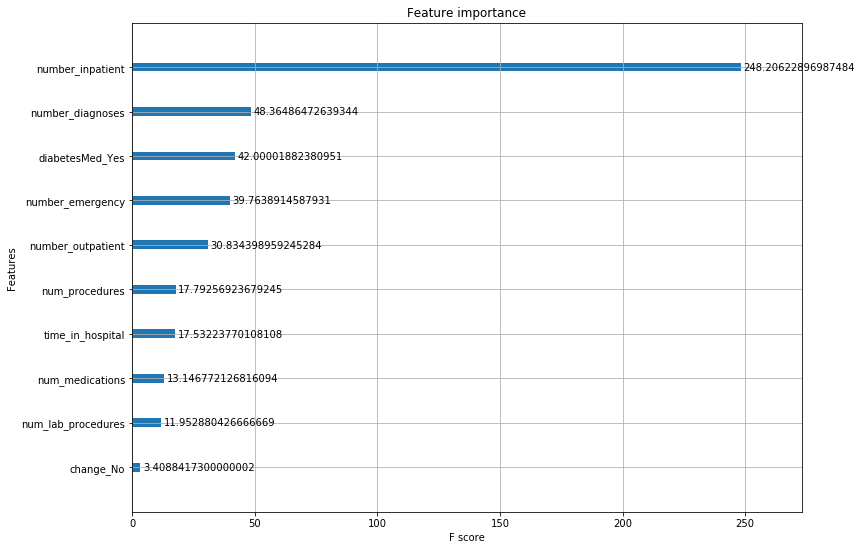

In [24]:
fig, ax = plt.subplots(figsize=(12,9))
plot_importance(booster=xgb,ax=ax,importance_type='gain')
plt.show()

In [25]:
y_pred = xgb.predict(X_test)

In [26]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

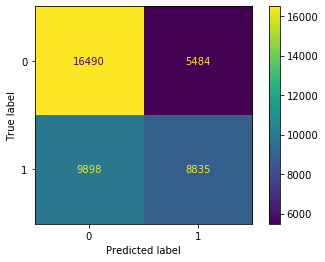

In [27]:
plot_confusion_matrix(xgb,X_test,y_test,values_format='.5g')
plt.show()

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.75      0.68     21974
           1       0.62      0.47      0.53     18733

    accuracy                           0.62     40707
   macro avg       0.62      0.61      0.61     40707
weighted avg       0.62      0.62      0.61     40707



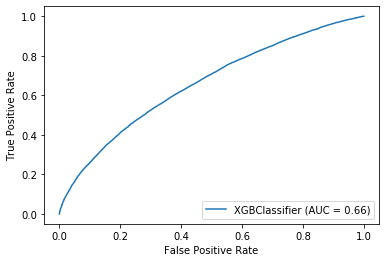

In [29]:
plot_roc_curve(xgb,X_test,y_test)
plt.show()

### Prune Features and Measure Results

In [30]:
df2 = pd.read_csv("train2.csv")

In [31]:
df2

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change_No,diabetesMed_Yes,readmitted
0,-1.137649,-0.106517,-0.785398,-1.848268,-0.291461,-0.21262,-0.503276,-3.321596,0.926591,-1.829868,0
1,1.877333,0.655900,0.387074,0.981622,-0.291461,-0.21262,-0.503276,0.815784,-1.079225,0.546488,1
2,1.542335,0.910040,1.559545,1.104660,-0.291461,-0.21262,-0.503276,0.815784,-1.079225,0.546488,0
3,2.212331,1.265834,-0.785398,1.104660,-0.291461,-0.21262,-0.503276,0.815784,-1.079225,0.546488,1
4,0.537341,0.198450,0.387074,-0.371804,-0.291461,-0.21262,-0.503276,0.298612,0.926591,-1.829868,0
...,...,...,...,...,...,...,...,...,...,...,...
101761,-1.137649,-2.139630,0.387074,-1.356113,-0.291461,-0.21262,-0.503276,-0.218561,0.926591,0.546488,0
101762,-0.132655,1.164179,-0.785398,-0.002688,-0.291461,-0.21262,-0.503276,0.815784,0.926591,-1.829868,0
101763,0.537341,0.910040,-0.199162,-0.248765,-0.291461,-0.21262,-0.503276,0.815784,0.926591,0.546488,0
101764,1.542335,0.096794,2.732016,0.858583,-0.291461,-0.21262,-0.503276,0.815784,0.926591,-1.829868,0


In [32]:
df3 = df2[['number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'diabetesMed_Yes','readmitted']]

In [33]:
df3

,number_outpatient,number_emergency,number_inpatient,number_diagnoses,diabetesMed_Yes,readmitted
0,-0.291461,-0.21262,-0.503276,-3.321596,-1.829868,0
1,-0.291461,-0.21262,-0.503276,0.815784,0.546488,1
2,-0.291461,-0.21262,-0.503276,0.815784,0.546488,0
3,-0.291461,-0.21262,-0.503276,0.815784,0.546488,1
4,-0.291461,-0.21262,-0.503276,0.298612,-1.829868,0
...,...,...,...,...,...,...
101761,-0.291461,-0.21262,-0.503276,-0.218561,0.546488,0
101762,-0.291461,-0.21262,-0.503276,0.815784,-1.829868,0
101763,-0.291461,-0.21262,-0.503276,0.815784,0.546488,0
101764,-0.291461,-0.21262,-0.503276,0.815784,-1.829868,0


In [34]:
X = df3.iloc[:,0:5]
y = df3.iloc[:,5]

In [35]:
X.values, y.values

(array([[-0.29146149, -0.21262018, -0.50327619, -3.3215959 , -1.82986799],
        [-0.29146149, -0.21262018, -0.50327619,  0.81578448,  0.54648751],
        [-0.29146149, -0.21262018, -0.50327619,  0.81578448,  0.54648751],
        ...,
        [-0.29146149, -0.21262018, -0.50327619,  0.81578448,  0.54648751],
        [-0.29146149, -0.21262018, -0.50327619,  0.81578448, -1.82986799],
        [-0.29146149, -0.21262018, -0.50327619,  0.81578448,  0.54648751]]),
 array([0, 1, 0, ..., 0, 0, 0], dtype=int64))

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=123)

In [37]:
X_train.shape, X_test.shape

((61059, 5), (40707, 5))

In [38]:
xgb = XGBClassifier(random_state=123, n_estimators=100, objective='binary:logistic')

In [39]:
xgb.fit(X_train,y_train,eval_set=[(X_test,y_test)],eval_metric='error',early_stopping_rounds=20)

[0]	validation_0-error:0.383398
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.384406
[2]	validation_0-error:0.383398
[3]	validation_0-error:0.384356
[4]	validation_0-error:0.383398
[5]	validation_0-error:0.383448
[6]	validation_0-error:0.383251
[7]	validation_0-error:0.383374
[8]	validation_0-error:0.384406
[9]	validation_0-error:0.384332
[10]	validation_0-error:0.383521
[11]	validation_0-error:0.383521
[12]	validation_0-error:0.383521
[13]	validation_0-error:0.383521
[14]	validation_0-error:0.383276
[15]	validation_0-error:0.383276
[16]	validation_0-error:0.382096
[17]	validation_0-error:0.382096
[18]	validation_0-error:0.3833
[19]	validation_0-error:0.380401
[20]	validation_0-error:0.380401
[21]	validation_0-error:0.380401
[22]	validation_0-error:0.380401
[23]	validation_0-error:0.380401
[24]	validation_0-error:0.380794
[25]	validation_0-error:0.380966
[26]	validation_0-error:0.380893
[27]	validation_0-error:0.381016
[28]	validation_0-erro

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [40]:
y_pred = xgb.predict(X_test)

In [41]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

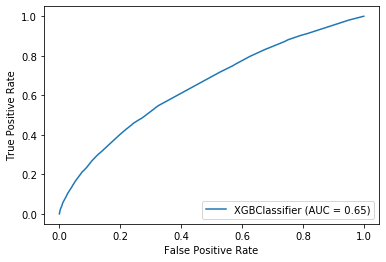

In [42]:
plot_roc_curve(xgb,X_test,y_test)
plt.show()

### After completing the iterative feature selection process, what was the effect on the AUC metric for the model?


It stayed the same


### Configure Hyperparameter Tuning

In [43]:
X_train.shape, X_test.shape

((61059, 5), (40707, 5))

In [44]:
hyper = XGBClassifier(learning_rate=0.3,max_depth=6,random_state=123, n_estimators=100, objective='binary:logistic')

In [45]:
hyper.fit(X_train,y_train,eval_set=[(X_test,y_test)],eval_metric='error',early_stopping_rounds=20)

[0]	validation_0-error:0.381802
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.381753
[2]	validation_0-error:0.380966
[3]	validation_0-error:0.380745
[4]	validation_0-error:0.381286
[5]	validation_0-error:0.38131
[6]	validation_0-error:0.381409
[7]	validation_0-error:0.381384
[8]	validation_0-error:0.381409
[9]	validation_0-error:0.381531
[10]	validation_0-error:0.381163
[11]	validation_0-error:0.381187
[12]	validation_0-error:0.381138
[13]	validation_0-error:0.381138
[14]	validation_0-error:0.381409
[15]	validation_0-error:0.381359
[16]	validation_0-error:0.38131
[17]	validation_0-error:0.381359
[18]	validation_0-error:0.381409
[19]	validation_0-error:0.381359
[20]	validation_0-error:0.381286
[21]	validation_0-error:0.38131
[22]	validation_0-error:0.38131
[23]	validation_0-error:0.381384
Stopping. Best iteration:
[3]	validation_0-error:0.380745



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [46]:
y_pred = hyper.predict(X_test)

In [47]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

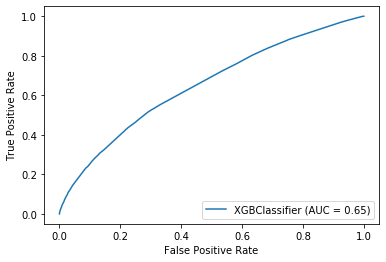

In [48]:
plot_roc_curve(hyper,X_test,y_test)
plt.show()

### Configure Cross Validation

In [49]:
cross = cross_val_score(hyper,X,y,scoring='roc_auc',cv=5,verbose=1,n_jobs=4)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:   13.9s finished


In [50]:
cross.mean()

0.6512926810550098